## Importing the modules

# Crop Recommendation Model

In [38]:
! pip install xgboost --user

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import time
from keras.wrappers.scikit_learn import KerasClassifier
warnings.filterwarnings('ignore')
# Import ML models
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# XGBoost Classifier
import xgboost as xgb

## Load the dataset

In [3]:
df = pd.read_csv('../datasets/crop-recommendation.csv')

In [4]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [5]:
df.size, df.shape

(17600, (2200, 8))

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

## Cleaning the data

Text(0.5, 1.0, 'Null values graph before clearing null values')

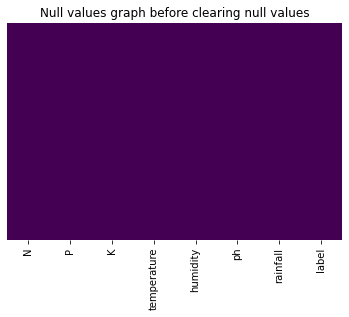

In [8]:
y_tick_labels = [i for i in range(df.shape[0])]
ax = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax.set_title('Null values graph before clearing null values')

In [10]:
# To verify if there are no null values already present, let's still check out the shapes of the dataframe before and after the dropna() function
print(f"So, before removing null values, the shape of the dataframe was: {df.shape}")
df.dropna()
print(f"After removing null values, the shape of the dataframe is: {df.shape}")

So, before removing null values, the shape of the dataframe was: (2200, 8)
After removing null values, the shape of the dataframe is: (2200, 8)


## Check out data dependencies and multicollinearity

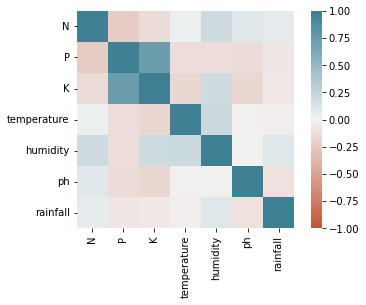

In [11]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [9]:
len(df['label'])

2200

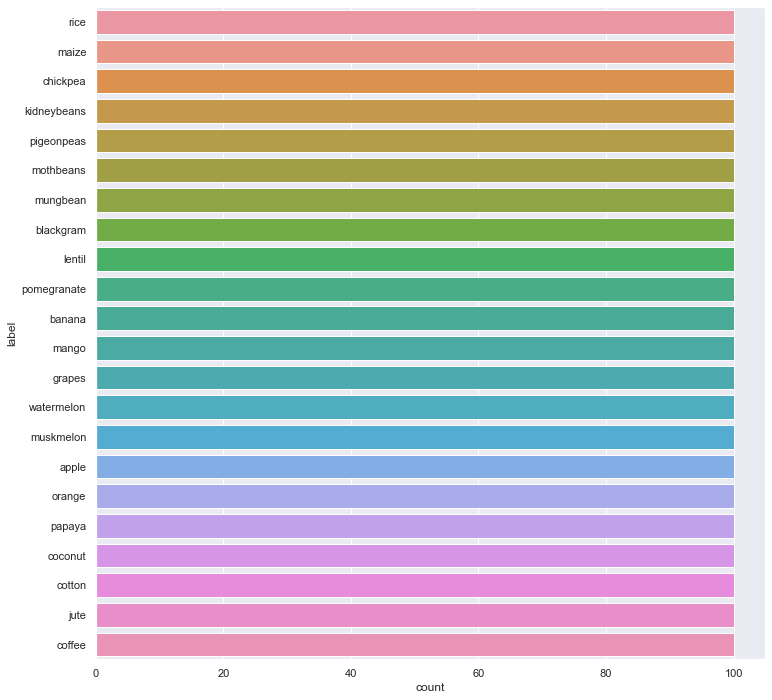

In [26]:
sns.countplot(y=df["label"])
sns.set(rc={'figure.figsize':(12, 12)})

## Split data into training and testing sections

In [12]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)

## Storing models along with their accuracies in an array 

In [39]:
models = dict()

In [40]:
def create_new_model(X_train, X_test, y_train, y_test, model_name):
    if model_name == 'Decision Tree Classifier':
        model = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        total_time = end_time - start_time
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"The accuracy for {model_name} model is {accuracy}.")
        models['Decision Tree Classifier'] = (model, accuracy, total_time)

    elif model_name == 'Gaussian Naive Bayes':
        model = GaussianNB()
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        total_time = end_time - start_time
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"The accuracy for {model_name} model is {accuracy}.")
        models['Gaussian Naive Bayes'] = (model, accuracy, total_time)

    elif model_name == 'Support Vector Machine':
        norm = MinMaxScaler().fit(X_train)
        X_train_norm = norm.transform(X_train)
        X_test_norm = norm.transform(X_test)
        model = SVC(kernel='poly', degree=3, C=1)
        start_time = time.time()
        model.fit(X_train_norm, y_train)
        end_time = time.time()
        total_time = end_time - start_time
        y_pred = model.predict(X_test_norm)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"The accuracy for {model_name} model is {accuracy}.")
        models['Support Vector Machine'] = (model, accuracy, total_time)

    elif model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=2)
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        total_time = end_time - start_time
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"The accuracy for {model_name} model is {accuracy}.")
        models['Logistic Regression'] = (model, accuracy, total_time)

    elif model_name == 'Random Forest Classifier':
        model = RandomForestClassifier(n_estimators=20, random_state=0)
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        total_time = end_time - start_time
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"The accuracy for {model_name} model is {accuracy}.")
        models['Random Forest Classifier'] = (model, accuracy, total_time)

    elif model_name == 'XGBoost Classifier':
        model = xgb.XGBClassifier()
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        total_time = end_time - start_time
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"The accuracy for {model_name} model is {accuracy}.")
        models['XGBoost Classifier'] = (model, accuracy, total_time) 
    print(find_validation_df(y_test, y_pred).head())



## Generate validation dataframe for testing data and predictions

In [41]:
def find_validation_df(y_test, y_pred):
    data = [[test, pred] for index, (test, pred) in enumerate(zip(y_test, y_pred))]
    validation_df = pd.DataFrame(data, columns = ['Testing Value', 'Predicted Value'])
    return validation_df

## Models

### Decision Tree Classifier

In [42]:
create_new_model(X_train, X_test, y_train, y_test, 'Decision Tree Classifier')

The accuracy for Decision Tree Classifier model is 0.9.
  Testing Value Predicted Value
0        coffee          coffee
1   pomegranate     pomegranate
2   pomegranate     pomegranate
3        cotton          cotton
4      mungbean        mungbean


### Gaussian Naive Bayes

In [43]:
create_new_model(X_train, X_test, y_train, y_test, 'Gaussian Naive Bayes')

The accuracy for Gaussian Naive Bayes model is 0.990909090909091.
  Testing Value Predicted Value
0        coffee          coffee
1   pomegranate     pomegranate
2   pomegranate     pomegranate
3        cotton          cotton
4      mungbean        mungbean


### Support Vector Machine

In [44]:
create_new_model(X_train, X_test, y_train, y_test, 'Support Vector Machine')

The accuracy for Support Vector Machine model is 0.9795454545454545.
  Testing Value Predicted Value
0        coffee          coffee
1   pomegranate     pomegranate
2   pomegranate     pomegranate
3        cotton          cotton
4      mungbean        mungbean


### Logistic Regression

In [45]:
create_new_model(X_train, X_test, y_train, y_test, 'Logistic Regression')

The accuracy for Logistic Regression model is 0.9522727272727273.
  Testing Value Predicted Value
0        coffee          coffee
1   pomegranate     pomegranate
2   pomegranate     pomegranate
3        cotton          cotton
4      mungbean        mungbean


### Random Forest Classifier

In [46]:
create_new_model(X_train, X_test, y_train, y_test, 'Random Forest Classifier')

The accuracy for Random Forest Classifier model is 0.990909090909091.
  Testing Value Predicted Value
0        coffee          coffee
1   pomegranate     pomegranate
2   pomegranate     pomegranate
3        cotton          cotton
4      mungbean        mungbean


### XGBoost Classifier

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc = encoder.fit_transform(df['label'])
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)
class_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(class_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [48]:
create_new_model(X_train, X_test, y_train_enc, y_test_enc, 'XGBoost Classifier')

The accuracy for XGBoost Classifier model is 0.9931818181818182.
   Testing Value  Predicted Value
0              5                5
1             19               19
2             19               19
3              6                6
4             14               14


## Find out the best model

In [49]:
for item in models.items():
  print(item)

('Decision Tree Classifier', (DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2), 0.9, 0.032143354415893555))
('Gaussian Naive Bayes', (GaussianNB(), 0.990909090909091, 0.006486177444458008))
('Support Vector Machine', (SVC(C=1, kernel='poly'), 0.9795454545454545, 0.019932985305786133))
('Logistic Regression', (LogisticRegression(random_state=2), 0.9522727272727273, 0.19039487838745117))
('Random Forest Classifier', (RandomForestClassifier(n_estimators=20, random_state=0), 0.990909090909091, 0.10425257682800293))
('XGBoost Classifier', (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
             

In [27]:
def sort_comparator(m1, m2):
    if m1[1][1]> m2[1][1]:
        return -1
    elif m1[1][1] < m2[1][1]:
        return 1
    else:
        return 0

In [50]:
from functools import cmp_to_key
temp_arr = [item for item in models.items()]
best_model = sorted(temp_arr, key=cmp_to_key(sort_comparator))[1]
print(f"The best model is {best_model[0]}, with an accuracy of {best_model[1][1]}.")

The best model is Gaussian Naive Bayes, with an accuracy of 0.990909090909091.


In [51]:
print(models)

{'Decision Tree Classifier': (DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2), 0.9, 0.032143354415893555), 'Gaussian Naive Bayes': (GaussianNB(), 0.990909090909091, 0.006486177444458008), 'Support Vector Machine': (SVC(C=1, kernel='poly'), 0.9795454545454545, 0.019932985305786133), 'Logistic Regression': (LogisticRegression(random_state=2), 0.9522727272727273, 0.19039487838745117), 'Random Forest Classifier': (RandomForestClassifier(n_estimators=20, random_state=0), 0.990909090909091, 0.10425257682800293), 'XGBoost Classifier': (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_

In [52]:
models_summary = dict()
for key in models.keys():
  models_summary[key] = dict()
  models_summary[key]['Accuracy'] = f'{round(models[key][1]*100, 2)}%'
  models_summary[key]['Training Time'] = models[key][2]
  models_summary[key]['Model Factor'] = models[key][1]*100 / models[key][2]
  # models_summary.append(new_model)
models_summary_df = pd.DataFrame.from_dict(models_summary).transpose()
models_summary_df

,Accuracy,Training Time,Model Factor
Decision Tree Classifier,90.0%,0.032143,2799.956683
Gaussian Naive Bayes,99.09%,0.006486,15277.24302
Support Vector Machine,97.95%,0.019933,4914.193431
Logistic Regression,95.23%,0.190395,500.156693
Random Forest Classifier,99.09%,0.104253,950.488823
XGBoost Classifier,99.32%,0.752232,132.031346


## Save the best model

In [107]:
import pickle
import os
filepath = os.path.join(os.getcwd(), '../models', 'crop-recommendation-model.pkl')
with open(filepath, 'wb') as f:
    pickle.dump(best_model[1][0], f)

In [ ]:
image_cat = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']